In [1]:
import pandas as pd
import h5py

In [15]:
%matplotlib inline

# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'svg')
set_matplotlib_formats('retina', 'png')

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
#matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

import mpld3

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper")

# lowess for plotting
from statsmodels.nonparametric.smoothers_lowess import lowess

def stairs(df, start='start', end='end', pos='pos', endtrim=0):
    "Turn a df with start, end into one with pos to plot as stairs"
    df1 = df.copy(deep=True)
    df2 = df.copy(deep=True)
    df1[pos] = df1[start]
    df2[pos] = df2[end] - endtrim
    return pd.concat([df1, df2]).sort_values([start, end])

In [2]:
h5 = h5py.File('../test/chr2_136608646.h5', 'r')

In [4]:
for key, val in h5.attrs.items():
#     print(key, val)
    print(key, val.shape)

freqs (45,)
iHat ()
iSel (1,)
jHat ()
popsize (32,)
sGrid (51,)
sHat ()
samplingPopsize (32,)
t (32,)
tHat ()
xHat (31,)
xHatHi (31,)
xHatLo (31,)


In [4]:
for key, val in h5.items():
    print(key, val.shape)

logImportanceWeights (51, 1, 21)
logLikelihoodRatios (51, 1)
xMargs (31, 45)


In [15]:
h5['logImportanceWeights'][0]

array([[         -inf, -127.50897803, -127.55976454, -123.75478734,
                 -inf, -120.63547799, -123.03738896, -124.16413238,
        -129.30878019, -136.21543544, -127.36964595, -126.15353609,
        -122.58740588, -126.11941263,          -inf, -115.35736447,
        -115.22847063, -124.40019728, -124.5102707 , -126.37424279,
        -133.35205538]])

In [6]:
h5['logLikelihoodRatios'][:10]

array([[ 0.        ],
       [28.92046253],
       [26.04358878],
       [28.39105368],
       [28.57302243],
       [23.5871909 ],
       [28.94362602],
       [28.47422664],
       [27.19468152],
       [18.21654607]])

In [76]:
h5['xMargs']

<HDF5 dataset "xMargs": shape (31, 45), type "<f8">

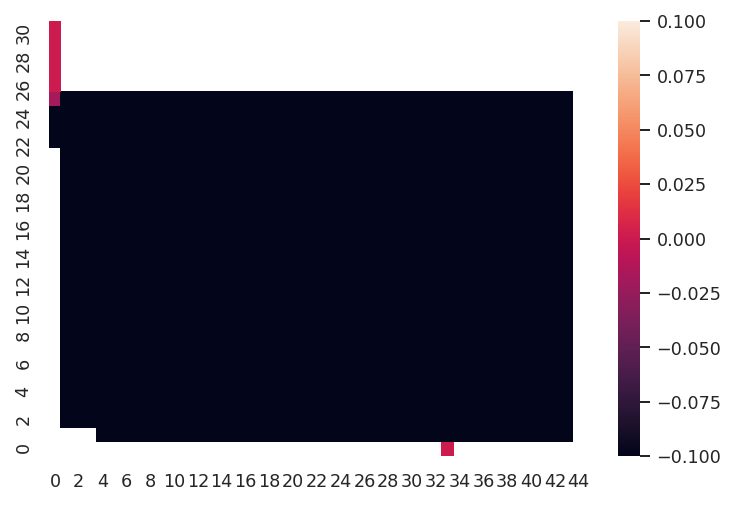

In [67]:
ax = sns.heatmap(h5['xMargs']) ;
ax.invert_yaxis()

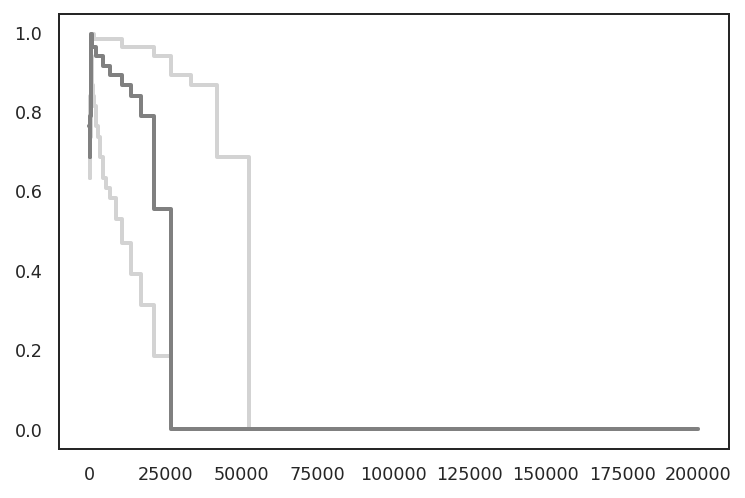

In [55]:
df = pd.DataFrame(dict(start=h5.attrs['t'][:-1], 
                       end=h5.attrs['t'][1:], 
                       freq=h5.attrs['xHat'],
                       upper=h5.attrs['xHatHi'],
                       lower=h5.attrs['xHatLo']
                           ))

plot_df = stairs(df)
with sns.axes_style('white'):
    plt.plot(plot_df.pos, plot_df.upper, color='lightgrey', linewidth=2)
    plt.plot(plot_df.pos, plot_df.lower, color='lightgrey', linewidth=2)
    plt.plot(plot_df.pos, plot_df.freq, color='grey', linewidth=2)

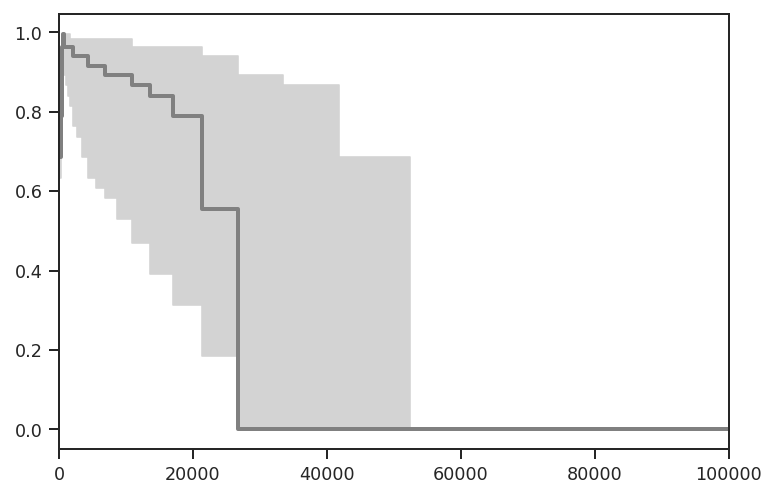

In [75]:
plot_df = stairs(df)
with sns.axes_style('ticks'):
    plt.fill_between(plot_df.pos, plot_df.upper, plot_df.lower, color='lightgrey')
    plt.plot(plot_df.pos, plot_df.freq, color='grey', linewidth=2)
#    sns.despine()
    plt.xlim(0, 100000)

In [82]:
logLikeliboodRatio = h5['logLikelihoodRatios'][h5.attrs['iHat'], h5.attrs['jHat']]
selection_coefihcient = h5.attrs['sHat']

In [83]:
logLikeliboodRatio, selection_coefihcient

(28.943626020317705, 0.00018486919763098964)